In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vqa-dataset/vqa_dataset/data-00016-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00004-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/state.json
/kaggle/input/vqa-dataset/vqa_dataset/data-00011-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/dataset_info.json
/kaggle/input/vqa-dataset/vqa_dataset/data-00002-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00028-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00015-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00013-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00019-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00027-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00031-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00006-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00033-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00008-of-00034.arrow
/kaggle/input/vqa-dataset/vqa_dataset/data-00025-of-00034.arrow

In [2]:
from datasets import load_from_disk

In [3]:
dataset = load_from_disk("/kaggle/input/vqa-dataset/vqa_dataset")

Loading dataset from disk:   0%|          | 0/34 [00:00<?, ?it/s]

In [4]:
answer_df = pd.DataFrame(dataset['multiple_choice_answer'],columns=['answer'])
print(answer_df)

         answer
0           net
1       pitcher
2        orange
3           yes
4         white
...         ...
110934        5
110935  indoors
110936     wood
110937       no
110938       no

[110939 rows x 1 columns]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

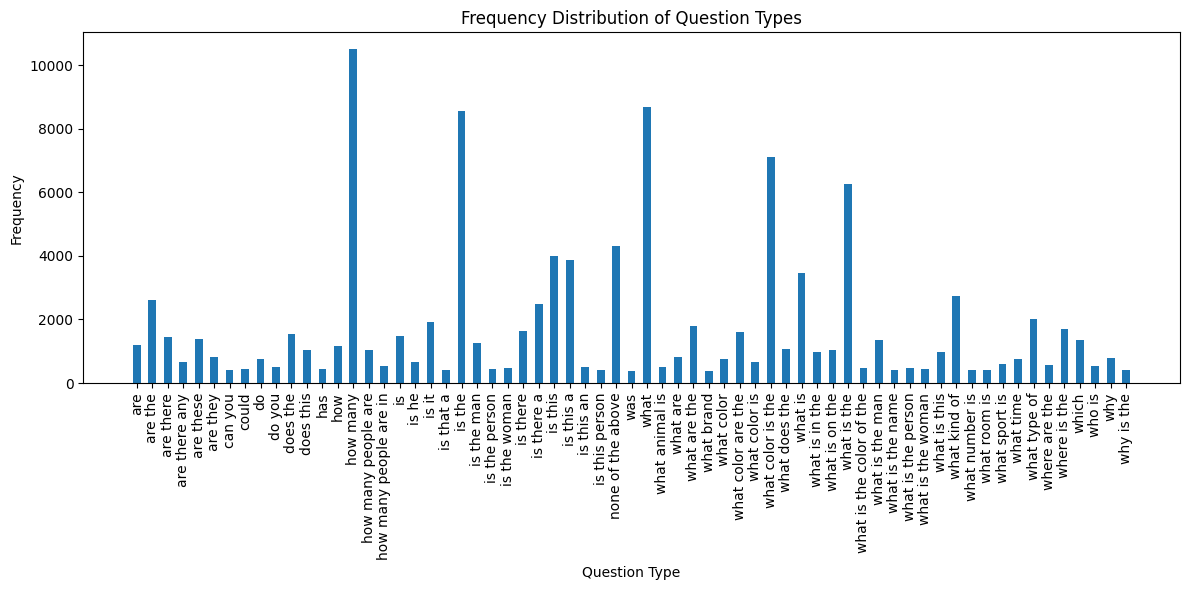

In [6]:
# Initialize an empty list to store the question types
question_types = []

# Iterate over the question types in the dataset
for question_type in dataset['question_type']:
    # Append the question type to the list
    question_types.append(question_type)

# Create a DataFrame from the question types
question_types_df = pd.DataFrame(question_types, columns=['question_type'])

# Count the frequency of each question type
question_type_distribution = question_types_df['question_type'].value_counts().sort_index()

# Visualize the distribution
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(question_type_distribution.index, question_type_distribution.values, width=0.5)  # Adjust width as needed
plt.xlabel('Question Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Question Types')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Questions with Multiple Answers: 8230


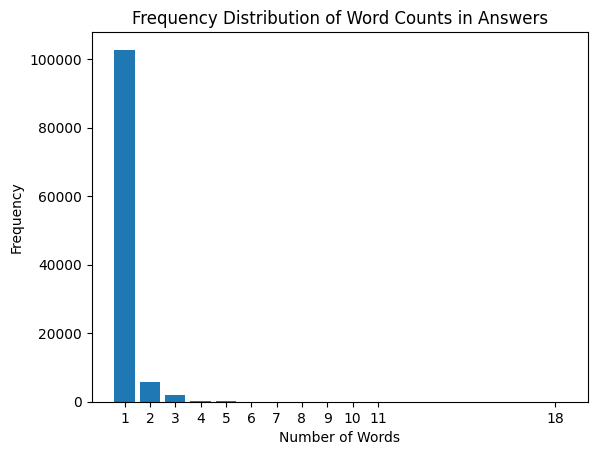

In [7]:
# Initialize an empty list to store the word counts
word_counts = []
ct = 0
mx = 0
# Iterate over the answers in the dataset
for answer in dataset['multiple_choice_answer']:
    # Split the answer into words using whitespace as the separator
    words = answer.split()
    # Count the number of words in the answer
    num_words = len(words)
    if num_words>1:
        ct+=1
    # Append the word count to the list
    word_counts.append(num_words)

# Create a DataFrame from the word counts
words_count = pd.DataFrame(word_counts, columns=['word_count'])

# Display the DataFrame

print("Questions with Multiple Answers:",ct)

# Count the frequency of each word count
word_count_distribution = words_count['word_count'].value_counts().sort_index()

# Visualize the distribution
plt.bar(word_count_distribution.index, word_count_distribution.values)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Word Counts in Answers')
plt.xticks(word_count_distribution.index)  # Ensure only integer values on x-axis
plt.show()

In [8]:
# Initialize an empty list to store the answer types
answer_types = []

# Iterate over the answer types in the dataset
for answer_type in dataset['answer_type']:
    # Append the answer type to the list
    answer_types.append(answer_type)

# Create a DataFrame from the answer types
answer_types_df = pd.DataFrame(answer_types, columns=['answer_type'])

# Count the frequency of each answer type
answer_type_distribution = answer_types_df['answer_type'].value_counts().sort_index()
print(answer_type_distribution)

answer_type
number    14344
other     55296
yes/no    41299
Name: count, dtype: int64


Total number of answers with color terms: 12594


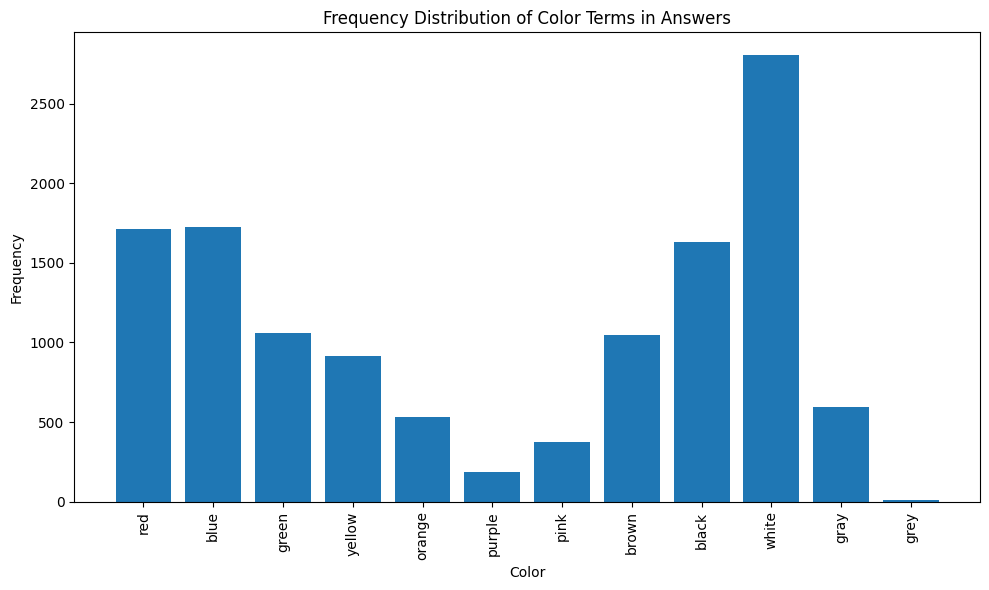

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# List of color terms
color_terms = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'white', 'gray', 'grey']

# Count the frequency of each color term across all answers
color_frequency = {color: 0 for color in color_terms}

# Iterate over the answers in the dataset
for answer in dataset['multiple_choice_answer']:
    # Iterate over color terms
    for color in color_terms:
        # Check if color term is present in the answer
        if color in answer.lower():
            color_frequency[color] += 1

# Convert the color frequency dictionary to a DataFrame
color_df = pd.DataFrame(list(color_frequency.items()), columns=['Color', 'Frequency'])
total_answers_with_color = sum(color_frequency.values())

print("Total number of answers with color terms:", total_answers_with_color)

# Visualize the distribution
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(color_df['Color'], color_df['Frequency'])  # Adjust width as needed
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Color Terms in Answers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Total number of answers with animal terms: 2985


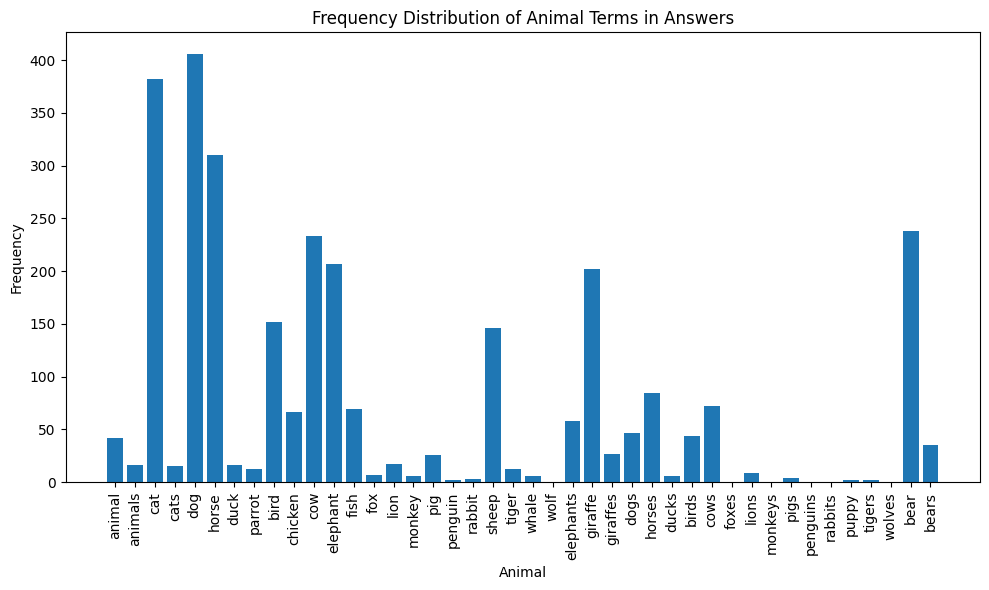

In [10]:
# List of animal terms
animal_terms = [
           "animal", "animals", "cat", "cats", "dog", "horse", "duck", "parrot", 
           "bird", "chicken", "cow", "elephant", "fish", "fox", "lion",
           "monkey", "pig", "penguin", "rabbit", "sheep", "tiger", "whale", 
           "wolf", "elephants", "giraffe", "giraffes", "dogs", "horses", 
           "ducks", "birds", "cows", "foxes", "lions", "monkeys", "pigs", 
           "penguins", "rabbits", "puppy", "tigers", "wolves", "bear", "bears"
    ]

# Count the frequency of each animal term across all answers
animal_frequency = {animal: 0 for animal in animal_terms}

# Iterate over the answers in the dataset
for answer in dataset['multiple_choice_answer']:
    # Iterate over animal terms
    for animal in animal_terms:
        # Check if animal term is present in the answer
        if animal in answer.lower():
            animal_frequency[animal] += 1

# Convert the animal frequency dictionary to a DataFrame
animal_df = pd.DataFrame(list(animal_frequency.items()), columns=['Animal', 'Frequency'])
total_answers_with_animal = sum(animal_frequency.values())

print("Total number of answers with animal terms:", total_answers_with_animal)

# Visualize the distribution
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(animal_df['Animal'], animal_df['Frequency'])  # Adjust width as needed
plt.xlabel('Animal')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Animal Terms in Answers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Total number of answers with terms related to people: 4189


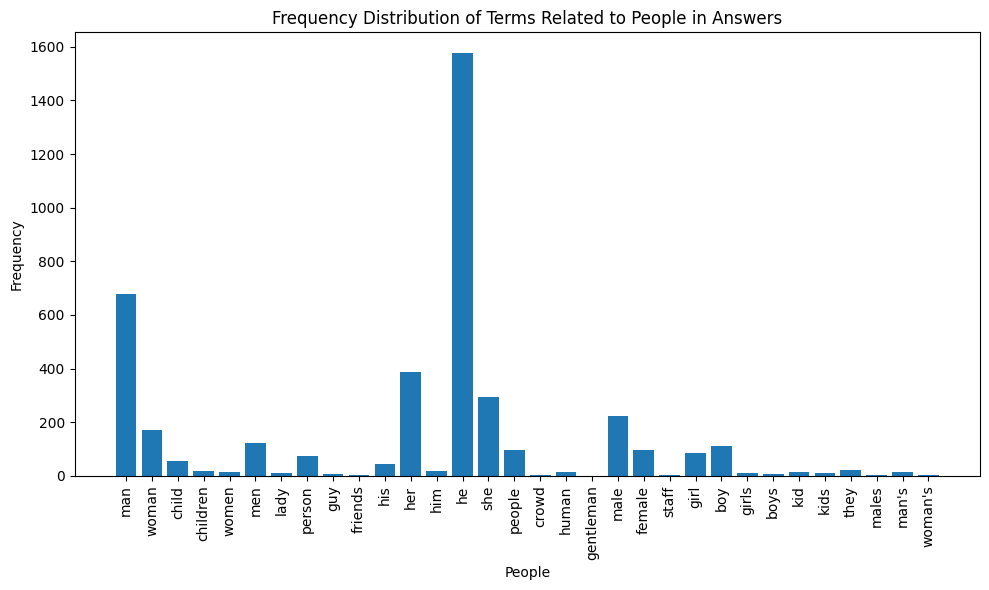

In [11]:
# List of terms related to people
people_terms = [
           "man", "woman", "child", "children", "women", "men", "lady", 
           "person", "guy", "friends", "his", "her", "him", "he", "she", 
           "people", "crowd", "human", "gentleman",
           "male", "female", "staff", "girl", "boy", "girls", "boys", "kid", 
           "kids", "they", "males",
           "man's", "woman's"
    ]

# Count the frequency of each term related to people across all answers
people_frequency = {person: 0 for person in people_terms}

# Iterate over the answers in the dataset
for answer in dataset['multiple_choice_answer']:
    # Iterate over terms related to people
    for person in people_terms:
        # Check if the term related to people is present in the answer
        if person in answer.lower():
            people_frequency[person] += 1

# Convert the people frequency dictionary to a DataFrame
people_df = pd.DataFrame(list(people_frequency.items()), columns=['People', 'Frequency'])
total_answers_with_people = sum(people_frequency.values())

print("Total number of answers with terms related to people:", total_answers_with_people)

# Visualize the distribution
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(people_df['People'], people_df['Frequency'])  # Adjust width and color as needed
plt.xlabel('People')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Terms Related to People in Answers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [12]:
# # Total number of answers with color terms, animal terms, and terms related to people
# total_answers_with_color = sum(color_frequency.values())
# total_answers_with_animal = sum(animal_frequency.values())
# total_answers_with_people = sum(people_frequency.values())

# # Total number of answers in the dataset
# total_answers = len(dataset)

# # Calculate the frequency of answers in the 'Others' category
# total_answers_in_categories = total_answers_with_color + total_answers_with_animal + total_answers_with_people
# total_answers_in_others = total_answers - total_answers_in_categories

# # Create a DataFrame to store the frequencies
# category_df = pd.DataFrame({
#     'Category': ['Colors', 'Animals', 'People', 'Others'],
#     'Frequency': [total_answers_with_color, total_answers_with_animal, total_answers_with_people, total_answers_in_others]
# })

# print(category_df)


In [ ]:
from PIL import Image

# Assuming 'dataset' is your DataFrame containing the 'image' column with PIL Image objects

# Initialize a dictionary to store the frequencies of image modes
image_mode_frequency = {}

# Iterate over the images in the 'image' column
for image in dataset['image']:
    # Get the mode of each image
    mode = image.mode
    
    # Increment the frequency count for the mode
    if mode in image_mode_frequency:
        image_mode_frequency[mode] += 1
    else:
        image_mode_frequency[mode] = 1

# Create a DataFrame from the image mode frequencies
image_mode_df = pd.DataFrame(image_mode_frequency.items(), columns=['Mode', 'Frequency'])

print(image_mode_df)


In [ ]:
print(dataset[0])